#**Analyzing and Predicting Traffic Accident Severity in Seattle, Washington**

*Anindya Chowdhury*

*September 28, 2020*


## **1.	Introduction**

**1.1	Background**

According to the World Health Organization (WHO), every year approximately 1.35 million people die from traffic accidents. Out of which 93% of the world’s fatalities happen in low and middle-income countries which only posses 60% of world’s vehicles. On top of it, traffic accidents are the leading causes of death among children and young adults aged 5-29 years. The seaport city of Seattle is the largest city in the state of Washington, as well as the largest in the Pacific Northwest. As of the latest census, there were 713,700 people living in Seattle. Seattle residents get around by car, trolley, streetcar, public bus, bicycle, on foot, and by rail. With such bustling streets, it is no surprise that Seattle sees car accidents every day. According to data from the Washington State Department of Transportation (WSDOT), last year, Seattle saw more than 10,315 crashes on the street.

**1.2	Problem**

In 2019 only, there were 22 fatal car accidents, 190 serious injury collisions, 834 minor injuries, 2612 possible injuries and 6657 apparent injuries in the Seattle. The goal of this project is to analyze the previously occurred traffic accidents’ severity and predict severity of new accidents which will help first responders and medics prepare themselves to take care of any such disaster.


**1.3	Interest**

Authorities like local Seattle government, police, paramedics, and public development authority will be interested in the model and its result as it might help them reduce occurrence of accidents and save life of citizens. The model might also help private companies, which are working on products related to public safety.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## **2.	Data**

**2.1	Data Sources**

The dataset, we will be using in this project was downloaded from the City of Seattle Open Data portal website. Seattle Police Department and Accident Traffic Records Department collected and maintained data from 2004 to present. The data includes many columns of details of the accidents and the severity of each car accidents.


In [2]:
!wget https://raw.githubusercontent.com/41x3n/Coursera-Capstone-Project/master/Collisions.csv

--2020-10-04 05:35:18--  https://raw.githubusercontent.com/41x3n/Coursera-Capstone-Project/master/Collisions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84756930 (81M) [text/plain]
Saving to: ‘Collisions.csv’

Collisions.csv      100%[===================>]  80.83M  26.2MB/s    in 3.1s    

2020-10-04 05:35:22 (26.2 MB/s) - ‘Collisions.csv’ saved [84756930/84756930]



In [3]:
df = pd.read_csv('Collisions.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1.268354e+06,265256.609668,1,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,,NaN,2,Injury Collision,Cycles,2,0,1,1,1,0,0,2013/03/14 00:00:00+00,3/14/2013 5:30:00 PM,Driveway Junction,18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N
1,1.259316e+06,202173.388163,2,56200,56200,1795087,Matched,Block,NaN,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,NaN,NaN,2,Injury Collision,Pedestrian,7,1,0,1,1,0,0,2006/01/15 00:00:00+00,1/15/2006 5:35:00 PM,Mid-Block (not related to intersection),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Dark - Street Lights On,NaN,6015003.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
2,1.264342e+06,259613.000382,3,327037,328537,E979380,Matched,Intersection,37122.0,3RD AVE NW AND NW 100TH ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,2019/09/09 00:00:00+00,9/9/2019 3:32:00 PM,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,1.279221e+06,222017.872023,4,327278,328778,E996362,Unmatched,Intersection,30602.0,M L KING JR WAY S AND S JACKSON ST,,NaN,1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2019/12/19 00:00:00+00,12/19/2019,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,1.262205e+06,242179.124204,5,1248,1248,3645424,Unmatched,Block,NaN,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,,NaN,0,Unknown,NaN,1,0,0,0,0,0,0,2013/03/27 00:00:00+00,3/27/2013,Mid-Block (not related to intersection),0.0,NOT ENOUGH INFORMATION / NOT APPLICABLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [5]:
df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

**2.2	Data Cleaning**

In our quest to predict the severity of an accident, we have come across a dataset which has lots of NaN values in its original form. It has 221,525 rows and 37 columns. After inspecting the dataset carefully using the metadata PDF, I have decided that only 6 columns can help us to make a proper prediction and they are - 'HITPARKEDCAR', 'LIGHTCOND', 'ROADCOND', 'WEATHER', 'UNDERINFL', 'SEVERITYCODE'. Out of which, 'SEVERITYCODE' is the target variable.  A code that corresponds to the severity of the collision: 

• 3—fatality 

• 2b—serious injury 

• 2—injury 

• 1—prop damage 

• 0—unknown

We will later convert the above to 0 and 1 where 0 - prop damage and 1 – injury.

After dropping the rows containing NaN values and unnecessary columns, we start label encoding the columns we have:

•	'HITPARKEDCAR' - {0: 'N', 1: 'Y'}

•	'LIGHTCOND' - {0: 'Dark - No Street Lights', 1: 'Dark - Street Lights Off', 2: 'Dark - Street Lights On', 3: 'Dark - Unknown Lighting', 4: 'Dawn', 5: 'Daylight', 6: 'Dusk', 7: 'Other', 8: 'Unknown'}

•	'ROADCOND' - {0: 'Dry', 1: 'Ice', 2: 'Oil', 3: 'Other', 4: 'Sand/Mud/Dirt', 5: 'Snow/Slush', 6: 'Standing Water', 7: 'Unknown', 8: 'Wet'}

•	'WEATHER' - {0: 'Blowing Sand/Dirt', 1: 'Clear', 2: 'Fog/Smog/Smoke', 3: 'Other', 4: 'Overcast', 5: 'Partly Cloudy', 6: 'Raining', 7: 'Severe Crosswind', 8: 'Sleet/Hail/Freezing Rain', 9: 'Snowing', 10: 'Unknown'}

•	'UNDERINFL' – {0: ‘N’, 1: ‘Y’}


In [6]:
df = df[[ 'INCDATE', 'ADDRTYPE', 'HITPARKEDCAR', 'LIGHTCOND', 'ROADCOND', 'WEATHER', 'UNDERINFL', 'SEVERITYCODE']]
print(df.shape)
df.head()

(221525, 8)


,INCDATE,ADDRTYPE,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL,SEVERITYCODE
0,2013/03/14 00:00:00+00,Block,N,Daylight,Dry,Clear,N,2
1,2006/01/15 00:00:00+00,Block,N,Dark - Street Lights On,Dry,Overcast,0,2
2,2019/09/09 00:00:00+00,Intersection,N,Daylight,Wet,Overcast,N,1
3,2019/12/19 00:00:00+00,Intersection,N,NaN,NaN,NaN,NaN,1
4,2013/03/27 00:00:00+00,Block,N,NaN,NaN,NaN,NaN,0


In [7]:
df.count()

INCDATE         221525
ADDRTYPE        217813
HITPARKEDCAR    221525
LIGHTCOND       194933
ROADCOND        195103
WEATHER         195022
UNDERINFL       195232
SEVERITYCODE    221524
dtype: int64

In [8]:
df = df.dropna()
df.count()

INCDATE         192934
ADDRTYPE        192934
HITPARKEDCAR    192934
LIGHTCOND       192934
ROADCOND        192934
WEATHER         192934
UNDERINFL       192934
SEVERITYCODE    192934
dtype: int64

In [9]:
df['INCDATE'] = pd.to_datetime(df['INCDATE']).dt.date

In [10]:
analysis = df.copy()

In [11]:
df['ADDRTYPE'].value_counts()

Block           126269
Intersection     65910
Alley              755
Name: ADDRTYPE, dtype: int64

In [12]:
df['HITPARKEDCAR'].value_counts()

N    185987
Y      6947
Name: HITPARKEDCAR, dtype: int64

In [13]:
c = df.HITPARKEDCAR.astype('category')

d = dict(enumerate(c.cat.categories))
print(d)
df['HITPARKEDCAR'] = df.HITPARKEDCAR.astype('category').cat.codes
df['HITPARKEDCAR'].value_counts()

{0: 'N', 1: 'Y'}


0    185987
1      6947
Name: HITPARKEDCAR, dtype: int64

In [14]:
df['LIGHTCOND'].value_counts()

Daylight                    118755
Dark - Street Lights On      49851
Unknown                      12658
Dusk                          6023
Dawn                          2597
Dark - No Street Lights       1568
Dark - Street Lights Off      1224
Other                          235
Dark - Unknown Lighting         23
Name: LIGHTCOND, dtype: int64

In [15]:
c = df.LIGHTCOND.astype('category')

d = dict(enumerate(c.cat.categories))
print(d)
df['LIGHTCOND'] = df.LIGHTCOND.astype('category').cat.codes
df['LIGHTCOND'].value_counts()

{0: 'Dark - No Street Lights', 1: 'Dark - Street Lights Off', 2: 'Dark - Street Lights On', 3: 'Dark - Unknown Lighting', 4: 'Dawn', 5: 'Daylight', 6: 'Dusk', 7: 'Other', 8: 'Unknown'}


5    118755
2     49851
8     12658
6      6023
4      2597
0      1568
1      1224
7       235
3        23
Name: LIGHTCOND, dtype: int64

In [16]:
df['ROADCOND'].value_counts()

Dry               127790
Wet                48475
Unknown            14069
Ice                 1216
Snow/Slush          1002
Other                128
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [17]:
c = df.ROADCOND.astype('category')

d = dict(enumerate(c.cat.categories))
print(d)
df['ROADCOND'] = df.ROADCOND.astype('category').cat.codes
df['ROADCOND'].value_counts()

{0: 'Dry', 1: 'Ice', 2: 'Oil', 3: 'Other', 4: 'Sand/Mud/Dirt', 5: 'Snow/Slush', 6: 'Standing Water', 7: 'Unknown', 8: 'Wet'}


0    127790
8     48475
7     14069
1      1216
5      1002
3       128
6       115
4        75
2        64
Name: ROADCOND, dtype: int64

In [18]:
df['WEATHER'].value_counts()

Clear                       114088
Raining                      33864
Overcast                     28386
Unknown                      14099
Snowing                        908
Other                          818
Fog/Smog/Smoke                 571
Sleet/Hail/Freezing Rain       115
Blowing Sand/Dirt               49
Severe Crosswind                26
Partly Cloudy                   10
Name: WEATHER, dtype: int64

In [19]:
c = df.WEATHER.astype('category')

d = dict(enumerate(c.cat.categories))
print(d)
df['WEATHER'] = df.WEATHER.astype('category').cat.codes
df['WEATHER'].value_counts()

{0: 'Blowing Sand/Dirt', 1: 'Clear', 2: 'Fog/Smog/Smoke', 3: 'Other', 4: 'Overcast', 5: 'Partly Cloudy', 6: 'Raining', 7: 'Severe Crosswind', 8: 'Sleet/Hail/Freezing Rain', 9: 'Snowing', 10: 'Unknown'}


1     114088
6      33864
4      28386
10     14099
9        908
3        818
2        571
8        115
0         49
7         26
5         10
Name: WEATHER, dtype: int64

In [20]:
df['UNDERINFL'].value_counts()

N    102374
0     80988
Y      5346
1      4226
Name: UNDERINFL, dtype: int64

In [21]:
df["UNDERINFL"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)
df["UNDERINFL"].replace("0", 0, inplace=True)
df["UNDERINFL"].replace("1", 1, inplace=True)
df['UNDERINFL'].value_counts()

0    183362
1      9572
Name: UNDERINFL, dtype: int64

In [22]:
df['SEVERITYCODE'].value_counts()

1     131959
2      57588
2b      3047
3        339
0          1
Name: SEVERITYCODE, dtype: int64

In [23]:
df["SEVERITYCODE"].replace("2b", 1, inplace=True)
df["SEVERITYCODE"].replace("3", 1, inplace=True)
df["SEVERITYCODE"].replace("0", 1, inplace=True)
df["SEVERITYCODE"].replace("2", 1, inplace=True)
df["SEVERITYCODE"].replace("1", 0, inplace=True)

In [24]:
df['SEVERITYCODE'].value_counts()

0    131959
1     60975
Name: SEVERITYCODE, dtype: int64

In [25]:
df.tail()

,INCDATE,ADDRTYPE,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL,SEVERITYCODE
221519,2019-10-30,Block,0,6,0,1,1,1
221520,2019-11-27,Block,0,5,0,1,0,1
221521,2019-12-08,Block,1,5,0,4,0,0
221522,2019-09-28,Block,1,5,0,1,0,0
221523,2019-11-06,Intersection,0,5,0,1,0,0


**2.3	Feature Selection**

A total of 5 features were selected to predict the target variable which is the 'SEVERITYCODE'.

•	'HITPARKEDCAR' - Whether the collision involved hitting a parked car. (Y/N)

•	'LIGHTCOND' - The light conditions during the collision.

•	'ROADCOND' - The condition of the road during the collision.

•	'WEATHER' - A description of the weather conditions during the time of the collision.

•	'UNDERINFL' – Whether or not a driver involved was under the influence of drugs or alcohol.


In [26]:
# HITPARKEDCAR SPEEDING PEDROWNOTGRNT LIGHTCOND ROADCOND WEATHER UNDERINFL INATTENTIONIND 
# SEVERITYCODE

feature_df = df[[ 'HITPARKEDCAR', 'LIGHTCOND', 'ROADCOND', 'WEATHER', 'UNDERINFL']]
print(feature_df.shape)
feature_df.head()

(192934, 5)


,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL
0,0,5,0,1,0
1,0,2,0,4,0
2,0,5,8,4,0
5,0,5,0,1,0
6,0,5,0,1,0


In [27]:
target_df = df[['SEVERITYCODE']]
print(target_df.shape)
target_df.head()

(192934, 1)


,SEVERITYCODE
0,1
1,1
2,0
5,1
6,0


## **3.	 Methodology**

**3.1	Exploratory Analysis**

In [28]:
analysis.head()

,INCDATE,ADDRTYPE,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL,SEVERITYCODE
0,2013-03-14,Block,N,Daylight,Dry,Clear,N,2
1,2006-01-15,Block,N,Dark - Street Lights On,Dry,Overcast,0,2
2,2019-09-09,Intersection,N,Daylight,Wet,Overcast,N,1
5,2005-07-07,Intersection,N,Daylight,Dry,Clear,0,2
6,2020-07-31,Intersection,N,Daylight,Dry,Clear,N,1


In [29]:
analysis['month'] = pd.DatetimeIndex(analysis['INCDATE']).month
analysis['year'] = pd.DatetimeIndex(analysis['INCDATE']).year
analysis.head()

,INCDATE,ADDRTYPE,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL,SEVERITYCODE,month,year
0,2013-03-14,Block,N,Daylight,Dry,Clear,N,2,3,2013
1,2006-01-15,Block,N,Dark - Street Lights On,Dry,Overcast,0,2,1,2006
2,2019-09-09,Intersection,N,Daylight,Wet,Overcast,N,1,9,2019
5,2005-07-07,Intersection,N,Daylight,Dry,Clear,0,2,7,2005
6,2020-07-31,Intersection,N,Daylight,Dry,Clear,N,1,7,2020


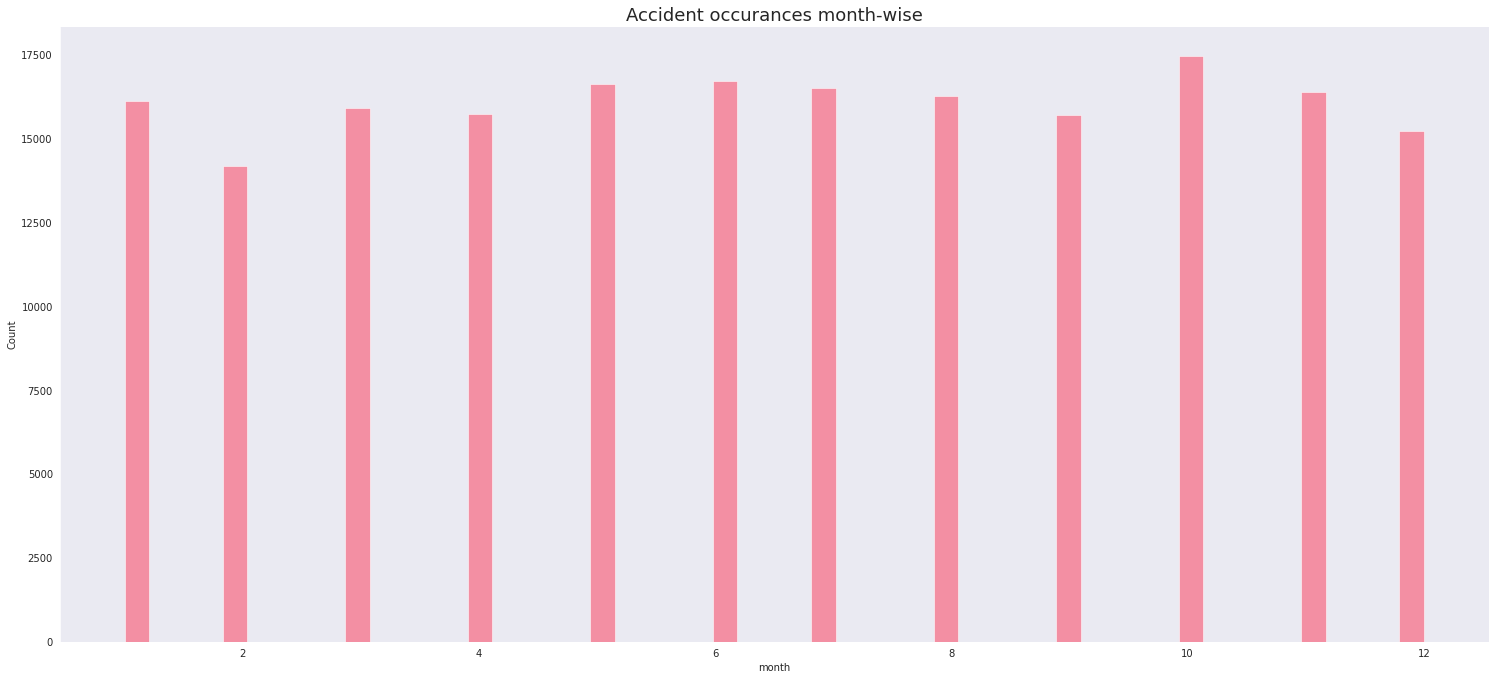

In [30]:
sns.set_style("dark")
sns.set_palette("husl")
monthly_accident = sns.displot(analysis, x="month")
monthly_accident.fig.set_size_inches(25,10)
plt.title('Accident occurances month-wise', fontsize=18)
plt.show()

First, we look at how the incidents are spread across all the months. At a glance we see that number of traffic accidents are more or less same in all months. However, it does peak in October.

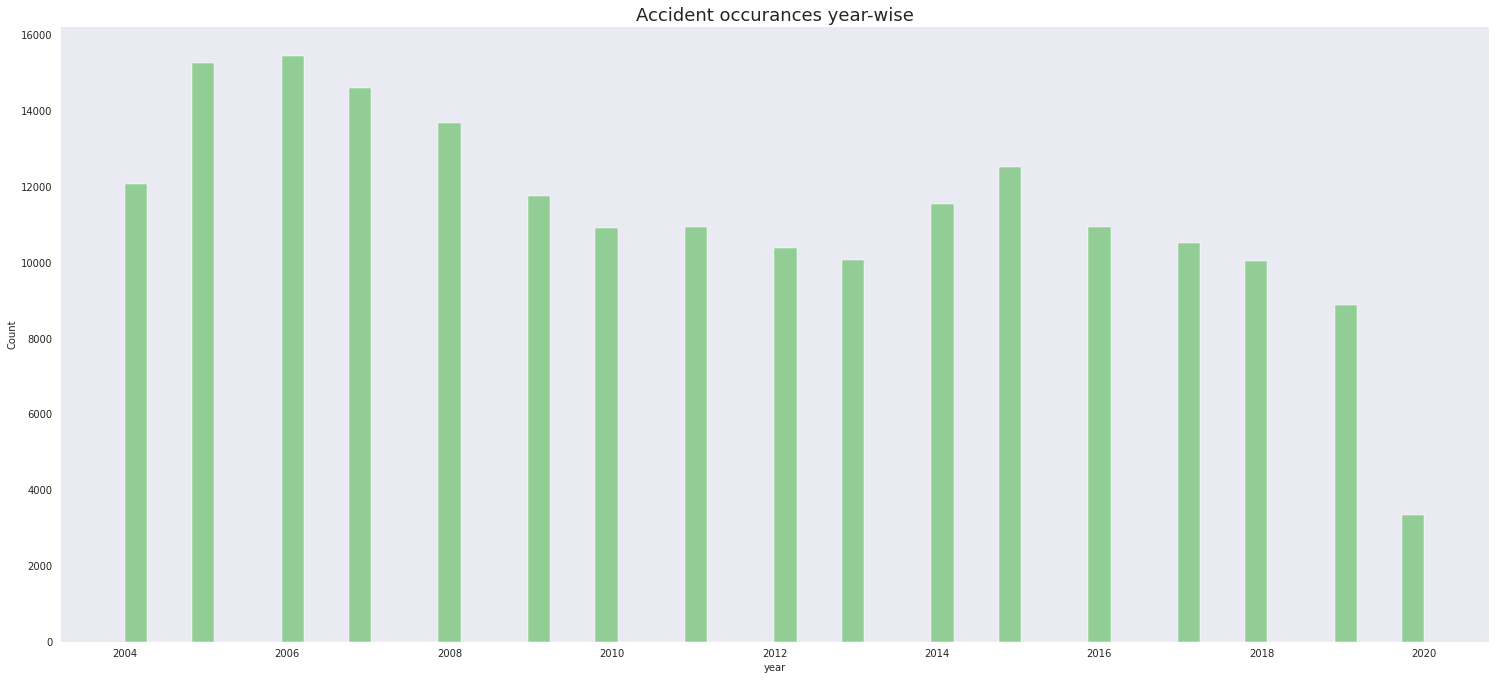

In [31]:
sns.set_style("dark")
sns.set_palette("Greens", 1)
yearly_accident = sns.displot(analysis, x="year")
yearly_accident.fig.set_size_inches(25,10)
plt.title('Accident occurances year-wise', fontsize=18)
plt.show()

And then we look at the data year-wise. Since the data collection started at 2004, the number of traffic case incidents have been slowly decreasing which is a good sign.

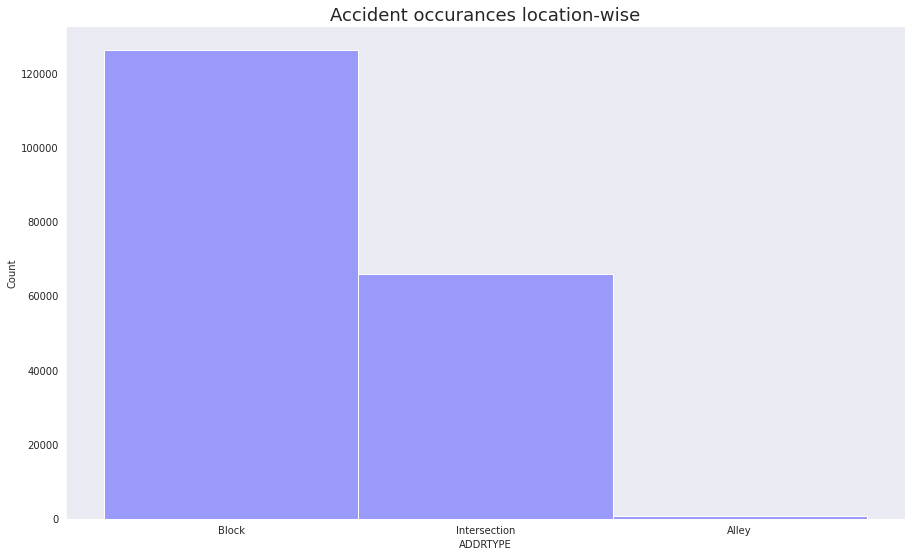

In [32]:
sns.set_style("dark")
sns.set_palette("cool", 1)
addr = sns.displot(analysis, x="ADDRTYPE")
addr.fig.set_size_inches(15,8)
plt.title('Accident occurances location-wise', fontsize=18)
plt.show()

From the next histogram, we can conclude that most of the accidents take place in busy places as the number of accidents in Block area is way more than Intersections and alleys.

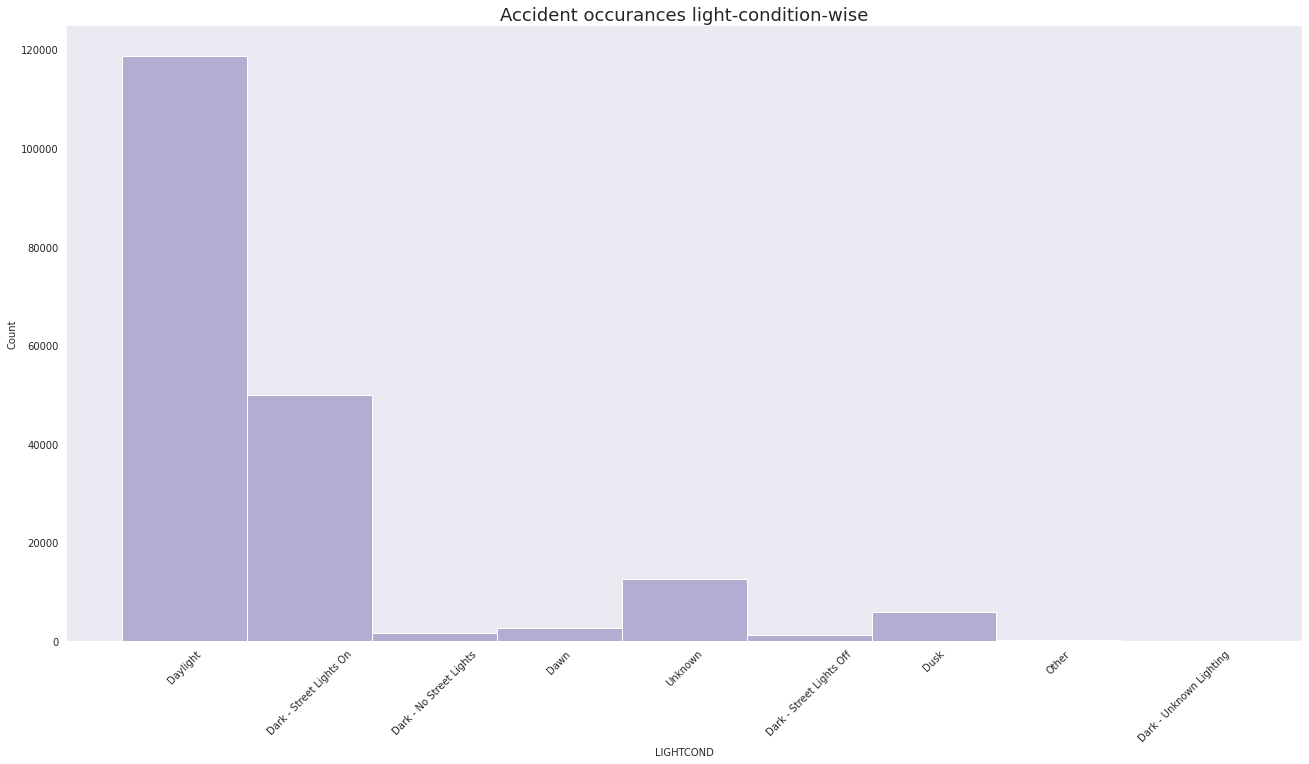

In [33]:
sns.set_style("dark")
sns.set_palette("Purples", 1)
addr = sns.displot(analysis, x="LIGHTCOND")
addr.fig.set_size_inches(25,10)
addr.set_xticklabels(rotation=45)
plt.title('Accident occurances light-condition-wise', fontsize=18)
plt.show()

In our next visualization, we look at the count of accidents on basis of the time of the day it took place. Majority of the traffic accidents took place at daylight. Less than half of it took place at night, out of which most were in places where there are traffic lights. It rises a question that since most accidents are taking place in well lit areas, does that mean majority accidents are due to not following traffic rules rather than uncontrolled situation?

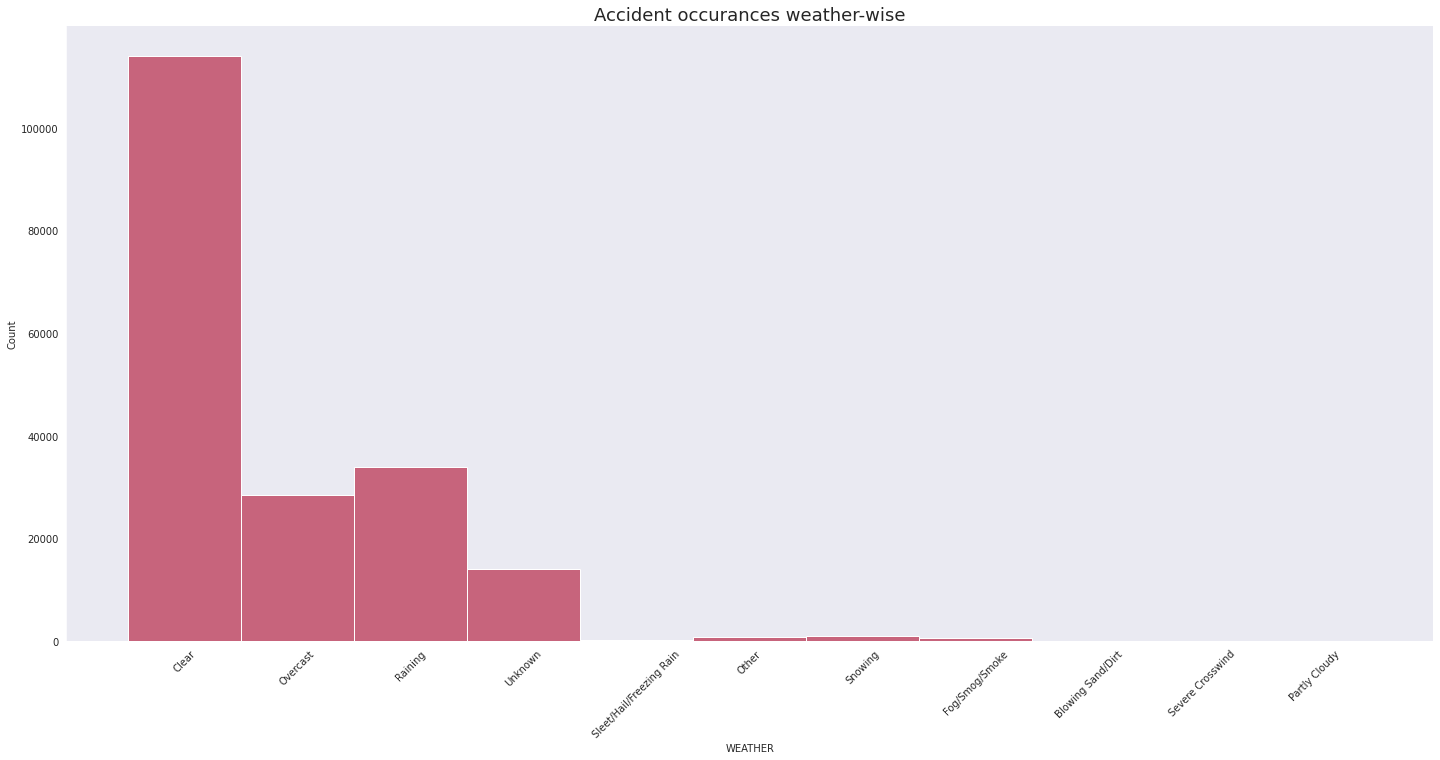

In [34]:
sns.set_style("dark")
sns.set_palette("inferno", 1)
addr = sns.displot(analysis, x="WEATHER")
addr.fig.set_size_inches(25,10)
addr.set_xticklabels(rotation=45)
plt.title('Accident occurances weather-wise', fontsize=18)
plt.show()

Then in the next graph, we look at the weather during the accidents. Majority of the traffic accidents took place on clear days. Only few cases took place in rainy days. This again rises the question, does that mean majority accidents are due to not following traffic rules rather than uncontrolled situation?

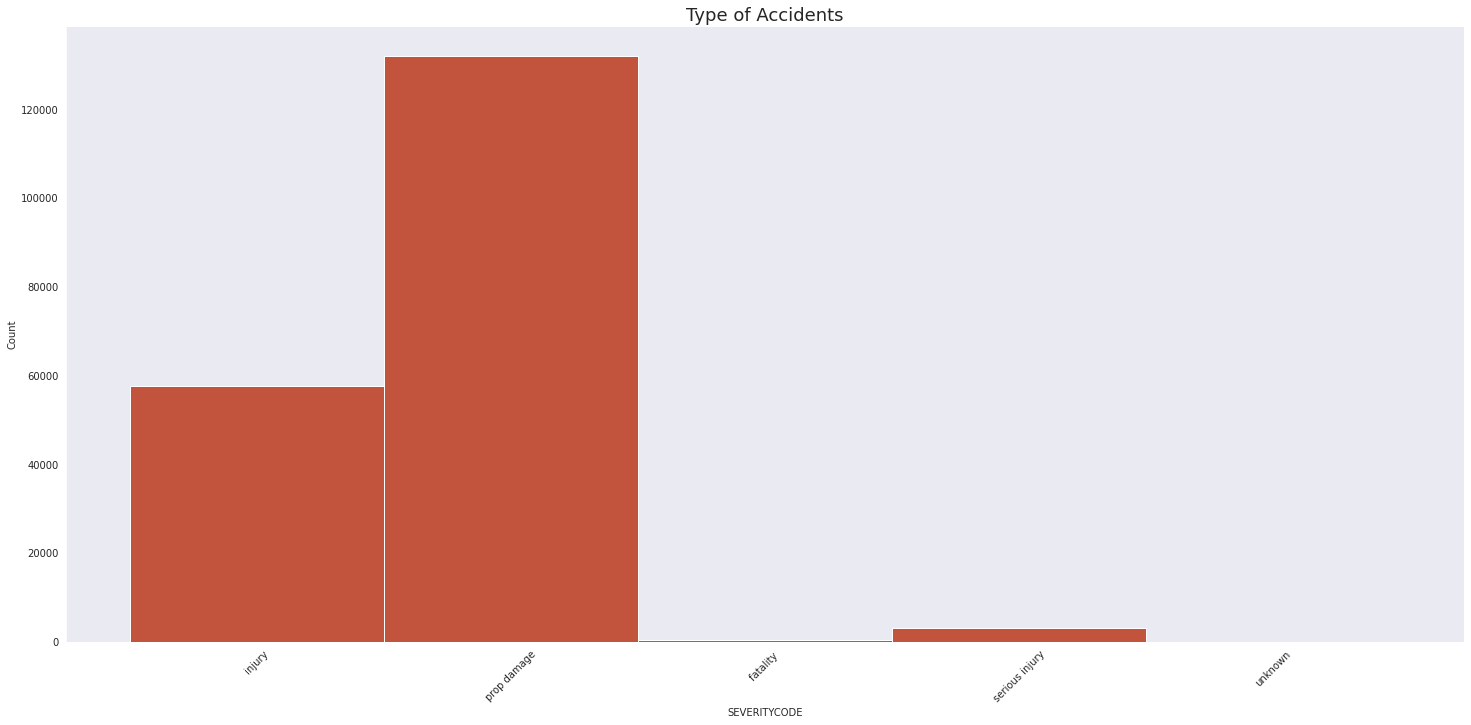

In [35]:
sns.set_style("dark")
sns.set_palette("gnuplot", 1)
addr = sns.displot(analysis, x="SEVERITYCODE")
addr.fig.set_size_inches(25,10)
addr.set_xticklabels(["injury", "prop damage", "fatality ", "serious injury", "unknown"], rotation=45)
plt.title('Type of Accidents', fontsize=18)
plt.show()

In the last visualization, we look at the severity of each accidents. Most of the accidents are usually just property damages and in half of that number, injuries took place. There is also extremely low number of fatality cases which is a good sign.

**3.2	Machine Learning Model Selection**

The Machine Learning models we will be using are – 

**•	Logistic regression -**

o	Definition: Logistic regression is a machine learning algorithm for classification. In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

o	Advantages: Logistic regression is designed for this purpose (classification) and is most useful for understanding the influence of several independent variables on a single outcome variable.

o	Disadvantages: Works only when the predicted variable is binary, assumes all predictors are independent of each other and assumes data is free of missing values.

**•	K-Nearest Neighbors –**

o	Definition: Neighbors based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbors of each point.

o	Advantages: This algorithm is simple to implement, robust to noisy training data, and effective if training data is large.

o	Disadvantages: Need to determine the value of K and the computation cost is high as it needs to compute the distance of each instance to all the training samples.

**•	Decision Tree -**

o	Definition: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

o	Advantages: Decision Tree is simple to understand and visualize, requires little data preparation, and can handle both numerical and categorical data.

o	Disadvantages: Decision tree can create complex trees that do not generalize well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.


In [36]:
feature_df.head()

,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL
0,0,5,0,1,0
1,0,2,0,4,0
2,0,5,8,4,0
5,0,5,0,1,0
6,0,5,0,1,0


In [37]:
X = feature_df
# X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL
0,0,5,0,1,0
1,0,2,0,4,0
2,0,5,8,4,0
5,0,5,0,1,0
6,0,5,0,1,0


In [38]:
target_df.head()

,SEVERITYCODE
0,1
1,1
2,0
5,1
6,0


In [39]:
y = target_df['SEVERITYCODE'].values
y[0:5]

array([1, 1, 0, 1, 0])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

jss_list = []
f1_list = []

Train set: (154347, 5) (154347,)
Test set: (38587, 5) (38587,)


##**4.Results**

**4.1  Logistic regression**

We used Logistic Regression from the scikit-learn library to run the Logistic Regression Classification model on our cleaned dataset. Using log_loss metric, we were able to decide on the best available parameters for our model. We used ‘liblinear’ as our Solver and we took C (regularization strength) value as ‘0.001’.

In [41]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))
                              
    print('\n')

Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.6051470625288512
Test 2: Accuracy at C = 0.1 when Solver = saga is : 0.6051476700417242
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.6051470077171213
Test 4: Accuracy at C = 0.1 when Solver = newton-cg is : 0.605147062673419
Test 5: Accuracy at C = 0.1 when Solver = sag is : 0.6051498114137713


Test 6: Accuracy at C = 0.01 when Solver = lbfgs is : 0.6053105548374704
Test 7: Accuracy at C = 0.01 when Solver = saga is : 0.6053104195434652
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.6053111054081547
Test 9: Accuracy at C = 0.01 when Solver = newton-cg is : 0.6053105983655177
Test 10: Accuracy at C = 0.01 when Solver = sag is : 0.6053109036034255


Test 11: Accuracy at C = 0.001 when Solver = lbfgs is : 0.6074006572290601
Test 12: Accuracy at C = 0.001 when Solver = saga is : 0.6074006462902893
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.6074777254561141
Test 14: Accuracy at C = 0.001 wh

From above we find out that the best parameters are C = 0.001 and Solver = liblinear 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score, f1_score

lr_model = LogisticRegression(C = 0.001, solver = 'liblinear')
lr_model.fit(X_train, y_train)
lr_yhat = lr_model.predict(X_test)

jss = round(jaccard_similarity_score(y_test, lr_yhat), 2)
jss_list.append(jss)
f1 = round(f1_score(y_test, lr_yhat, average = 'weighted'), 2)
f1_list.append(f1)

print(lr_model.score(X_test, y_test))
print(f"jaccard similarity score - ", jss)
print(f"f1 score - ", f1)

0.6882369710005961
jaccard similarity score -  0.69
f1 score -  0.56


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


[[26543    27]
 [12003    14]]


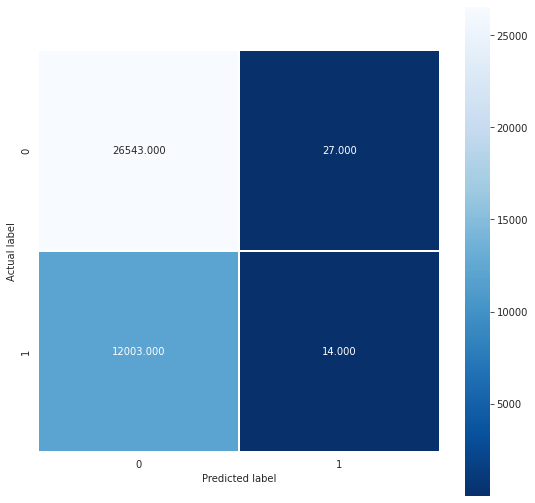

In [51]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, lr_yhat)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

**4.2 K-Nearest Neighbors**

We used K-Nearest Neighbors from the scikit-learn library to run the K-Nearest Neighbors machine learning classifier on our cleaned dataset. Using accuracy_score metric, we were able to decide on the best available parameters for our model. We used 8 as K’s value as the highest elbow bend exists at 8.

k = 1 has a Score = 0.6681524865887475 
k = 2 has a Score = 0.6784409257003654 
k = 3 has a Score = 0.6512815196827947 
k = 4 has a Score = 0.6780262782802499 
k = 5 has a Score = 0.668670795863892 
k = 6 has a Score = 0.6783890947728509 
k = 7 has a Score = 0.6707181175007126 
k = 8 has a Score = 0.6803586700184 
k = 9 has a Score = 0.6645761525902506 


Text(0, 0.5, 'Testing Accuracy Values')

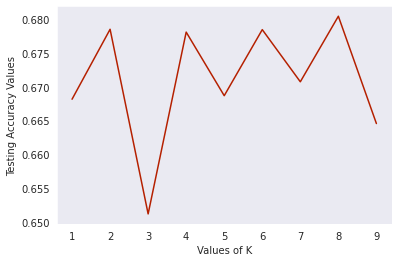

In [43]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

ks = range(1, 10)
mean_accuracy = []

for n in ks:
    knn_model  = knn(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_yhat))

for i in range(0, len(mean_accuracy)):
    print("k = {} has a Score = {} ".format(i+1, mean_accuracy[i]))

# Relation between k's and their respective accuracies

plt.plot(ks, mean_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy Values')



Final Model with best value of k, which is 8

In [44]:
knn_model = knn(n_neighbors = 8)
knn_model.fit(X_train, y_train)
knn_yhat = knn_model.predict(X_test)

jss = round(jaccard_similarity_score(y_test, knn_yhat), 2)
jss_list.append(jss)
f1 = round(f1_score(y_test, knn_yhat, average = 'weighted'), 2)
f1_list.append(f1)

print(knn_model.score(X_test, y_test))
print(f"jaccard similarity score - ", jss)
print(f"f1 score - ", f1)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6803586700184
jaccard similarity score -  0.68
f1 score -  0.58


**4.3  Decision Tree**

We used Decision Tree Classifier from the scikit-learn library to run the Decision Tree Classification model on our cleaned dataset. Using jaccard_similarity_score and f1_score metric, we were able to decide on the best available parameter for our model. We found out, our model should have a depth of ‘3’ to perform the best.

In [45]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

depth_range = range(1, 10)
jaccard_similarity_score_ = []
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    jaccard_similarity_score_.append(jaccard_similarity_score(y_test, dt_yhat))
    f1_score_.append(f1_score(y_test, dt_yhat, average = 'weighted'))

result = pd.DataFrame([jaccard_similarity_score_, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9'])
result.columns.name = 'Evaluation Metrices'
result

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/me

Evaluation Metrices,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9
Jaccard,0.688574,0.688574,0.688574,0.688470,0.688548,0.688522,0.688289,0.688211,0.688237
F1,0.561579,0.561579,0.561579,0.561529,0.561806,0.561746,0.562158,0.562405,0.562418


According to above table, our Main Model should have a depth of 3

In [46]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
dt_model.fit(X_train, y_train)

jss = round(jaccard_similarity_score(y_test, dt_yhat), 2)
jss_list.append(jss)
f1 = round(f1_score(y_test, dt_yhat, average = 'weighted'), 2)
f1_list.append(f1)

print(dt_model.score(X_test, y_test))
print(f"jaccard similarity score - ", jss)
print(f"f1 score - ", f1)

0.68857387202944
jaccard similarity score -  0.69
f1 score -  0.56


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


[[26536    34]
 [11996    21]]


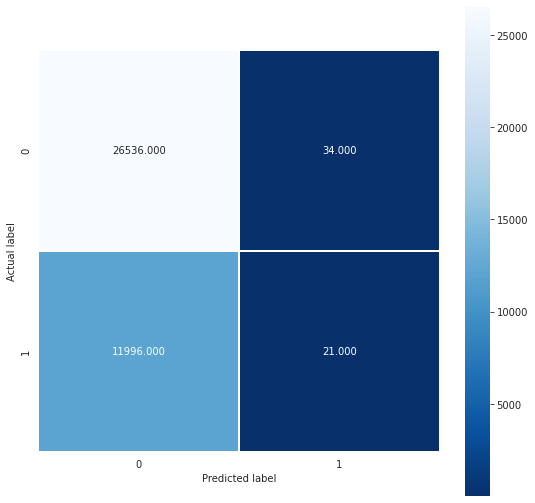

In [52]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, dt_yhat)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## **5.	Discussion**

The metrics we used to compare the accuracy of our models are the Jaccard Similarity Score and F1 Score. 

The Jaccard similarity index (sometimes called the Jaccard similarity coefficient) compares members for two sets to see which members are shared and which are distinct. It is a measure of similarity for the two sets of data, with a range from 0% to 100%. The higher the percentage, the more similar the two populations. Although it is easy to interpret, it is extremely sensitive to small samples sizes and may give erroneous results, especially with exceedingly small samples or data sets with missing observations.

In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive.

While all our models performed almost equally in those tests, KNN took too much time to yield result (almost 2 mins). Also, when it came to model score, all the models performed closed to each other. But score of Decision Tree was the highest, 0.6886 compared to KNN’s 0.6803 and Logistic Regression’s 0.6882.


In [47]:
columns = ['Logistic Regression', 'KNN', 'Decision Tree']
index = ['Jaccard', 'F1-score']

accuracy_df = pd.DataFrame([jss_list, f1_list], index = index, columns = columns)

accuracy = accuracy_df.transpose()
accuracy.columns.name = 'Algorithm'
accuracy

Algorithm,Jaccard,F1-score
Logistic Regression,0.69,0.56
KNN,0.68,0.58
Decision Tree,0.69,0.56


## **6.Conclusion**

We achieved 68% accuracy using Logistic Regression, KNN, and Decision Tree. However, the performance is not up to the mark. It could have been better if we were able to use more features with more categorized values. Another thing I would say that it is not appropriate to simplify the severity values into binary classes. If we could create a range, then we might have been able to predict severity of traffic cases better using regression models.